In [1]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
import numpy as np
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from keras.datasets import mnist

In [1]:
import numpy as np
from time import time

from keras.datasets import mnist

from tmu.models.classification.vanilla_classifier import TMClassifier

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = np.where(X_train.reshape((X_train.shape[0], 28*28)) > 75, 1, 0)
X_test = np.where(X_test.reshape((X_test.shape[0], 28*28)) > 75, 1, 0)

tm = TMClassifier(200, 5000, 10.0, max_included_literals=32, platform='CPU', weighted_clauses=True)

print("\nAccuracy over 10 epochs:\n")
for i in range(60):
        start_training = time()
        tm.fit(X_train, Y_train)
        stop_training = time()

        start_testing = time()
        result = 100*(tm.predict(X_test) == Y_test).mean()
        stop_testing = time()

        print("#%d Accuracy: %.2f%% Training: %.2fs Testing: %.2fs" % (i+1, result, stop_training-start_training, stop_testing-start_testing))


Accuracy over 60 epochs:

#1 Accuracy: 94.29% Training: 108.33s Testing: 5.82s
#2 Accuracy: 95.50% Training: 84.12s Testing: 5.79s


KeyboardInterrupt: 

In [4]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = np.where(X_train.reshape((X_train.shape[0], 28*28)) > 75, 1, 0)
X_test = np.where(X_test.reshape((X_test.shape[0], 28*28)) > 75, 1, 0)

tm = MultiClassTsetlinMachine(400, 50, 10.0)
ctm= MultiClassConvolutionalTsetlinMachine2D(400,50,10.0,(3, 3))


In [60]:

clause_wise_includes_temp=np.zeros(400,dtype=int)
class_wise_includes=np.zeros(10,dtype=int)
clause_wise_includes=[[0]*400]*10

test=np.zeros(1568)

tm.fit(X_train, Y_train, epochs=10)
ctm.fit(X_train, Y_train, epochs=5000)

for k in range(10):
    for j in range(400):
        for i in range(1568):
            test[i]=tm.ta_action(k,j,i)
        clause_wise_includes_temp[j]=test.sum()
    class_wise_includes[k]=clause_wise_includes_temp.sum()
    clause_wise_includes[k]=clause_wise_includes_temp
    


In [61]:

print("The total percentage includes:", ((class_wise_includes.sum()/(10*400*1568))*100))

The total percentage includes: 4.806074617346939


([<matplotlib.axis.XTick at 0x1be09813490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

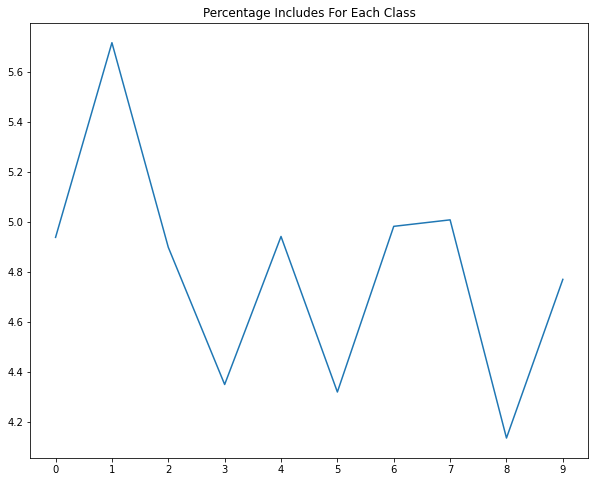

In [62]:
plt.figure(figsize=(10,8))
plt.plot((class_wise_includes)*100/(400*1568))
plt.title('Percentage Includes For Each Class')
plt.xticks(np.arange(0, 10, 1))
 

In [3]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
import numpy as np
from time import time

from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = np.where(X_train.reshape((X_train.shape[0], 28*28)) > 75, 1, 0) 
X_test = np.where(X_test.reshape((X_test.shape[0], 28*28)) > 75, 1, 0) 

tm = MultiClassTsetlinMachine(400, 50, 10.0)

print("\nAccuracy over 10 epochs:\n")
for i in range(10):
	start_training = time()
	tm.fit(X_train, Y_train, epochs=1, incremental=True)
	stop_training = time()

	start_testing = time()
	result = 100*(tm.predict(X_test) == Y_test).mean()
	stop_testing = time()

	print("#%d Accuracy: %.2f%% Training: %.2fs Testing: %.2fs" % (i+1, result, stop_training-start_training, stop_testing-start_testing))
    
	clause_wise_includes_temp=np.zeros(400,dtype=int)

	class_wise_includes=np.zeros(10,dtype=int)
	clause_wise_includes=[[0]*400]*10

	test=np.zeros(1568)

	for k in range(10):
		for j in range(400):
			for n in range(1568):
				test[n]=tm.ta_action(k,j,n)
			clause_wise_includes_temp[j]=test.sum()
		class_wise_includes[k]=clause_wise_includes_temp.sum()
		clause_wise_includes[k]=clause_wise_includes_temp
    
	print(" Total Include Percentage:", ((class_wise_includes.sum()/(10*400*1568))*100))
    


Accuracy over 10 epochs:

#1 Accuracy: 91.78% Training: 19.86s Testing: 2.04s
 Total Include Percentage: 4.7106664540816325
#2 Accuracy: 92.66% Training: 13.73s Testing: 2.01s
 Total Include Percentage: 6.2568718112244905
#3 Accuracy: 93.13% Training: 13.30s Testing: 2.18s
 Total Include Percentage: 7.246619897959183
#4 Accuracy: 93.39% Training: 13.36s Testing: 2.26s
 Total Include Percentage: 8.033482142857142
#5 Accuracy: 93.27% Training: 12.01s Testing: 2.01s
 Total Include Percentage: 8.606042729591836
#6 Accuracy: 93.77% Training: 11.75s Testing: 1.99s
 Total Include Percentage: 9.16329719387755
#7 Accuracy: 93.61% Training: 11.51s Testing: 1.93s
 Total Include Percentage: 9.611304209183674
#8 Accuracy: 93.54% Training: 11.40s Testing: 1.96s
 Total Include Percentage: 10.149649234693877
#9 Accuracy: 93.49% Training: 11.43s Testing: 1.96s
 Total Include Percentage: 10.59233099489796
#10 Accuracy: 93.31% Training: 11.22s Testing: 1.95s
 Total Include Percentage: 10.978093112244897

In [7]:
from pyTsetlinMachine.tm import MultiClassConvolutionalTsetlinMachine2D
import numpy as np
from time import time

from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#booleanization
X_train = np.where(X_train.reshape((X_train.shape[0], 28*28)) > 75, 1, 0) 
X_test = np.where(X_test.reshape((X_test.shape[0], 28*28)) > 75, 1, 0) 

#2D conversion
X_train = X_train[:,0:-1].reshape(X_train.shape[0], 28, 28)
Y_train = Y_train[:,-1]


X_test = X_test[:,0:-1].reshape(X_test.shape[0], 28, 28)
Y_test = Y_test[:,-1]



ctm= MultiClassConvolutionalTsetlinMachine2D(400,50,10.0,(3, 3))

print("\nAccuracy over 10 epochs:\n")
for i in range(10):
	start_training = time()
	ctm.fit(X_train, Y_train, epochs=1, incremental=True)
	stop_training = time()

	start_testing = time()
	result = 100*(ctm.predict(X_test) == Y_test).mean()
	stop_testing = time()

	print("#%d Accuracy: %.2f%% Training: %.2fs Testing: %.2fs" % (i+1, result, stop_training-start_training, stop_testing-start_testing))
    
	clause_wise_includes_temp=np.zeros(400,dtype=int)

	class_wise_includes=np.zeros(10,dtype=int)
	clause_wise_includes=[[0]*400]*10

	test=np.zeros(1568)

	for k in range(10):
		for j in range(400):
			for n in range(1568):
				test[n]=ctm.ta_action(k,j,n)
			clause_wise_includes_temp[j]=test.sum()
		class_wise_includes[k]=clause_wise_includes_temp.sum()
		clause_wise_includes[k]=clause_wise_includes_temp
    
	print(" Total Include Percentage:", ((class_wise_includes.sum()/(10*400*1568))*100))
    

ValueError: cannot reshape array of size 46980000 into shape (60000,28,28)